## Tutorial 1: Reading and plotting a spectrum

Here we will read and plot a spectrum and its CCF from the HARPS spectrograph.

In [79]:
from actin2 import ACTIN

actin = ACTIN()
print(actin.__doc__)

The ACTIN class. Reads fits files and calculates activity indices.

    Attributes:
        ReadSpec (actin2.ReadSpec) : Object that reads spectrum and   
            headers.
        IndTable (actin2.IndTable) : Object containing the 
            indices table.
        ProcessSpec (actin2.ProcessSpec) : Object to process the 
            spectrum.
    


First we are going to use a fits file provided by `actin` in the ``test`` directory.

In [80]:
import os, glob
files = glob.glob(os.path.join(os.pardir, os.pardir, os.pardir, "actin2/test/HARPS/HD41248", "*_s1d_A.fits"))
print(files)

['../../../actin2/test/HARPS/HD41248/HARPS.2014-01-24T01:18:06.472_s1d_A.fits', '../../../actin2/test/HARPS/HD41248/HARPS.2014-01-16T06:24:23.418_s1d_A.fits', '../../../actin2/test/HARPS/HD41248/HARPS.2014-01-24T04:17:29.213_s1d_A.fits', '../../../actin2/test/HARPS/HD41248/HARPS.2014-01-21T05:33:32.740_s1d_A.fits', '../../../actin2/test/HARPS/HD41248/HARPS.2014-01-21T03:16:16.891_s1d_A.fits', '../../../actin2/test/HARPS/HD41248/HARPS.2014-01-16T05:37:46.157_s1d_A.fits']


Now we read the spectrum by calling the class `actin.ReadSpec` with the file name inside `files` the list. The class ``actin.ReadSpec`` can read one fits file and identify the spectrum to read it automatically.

In [81]:
read_spec = actin.ReadSpec(files[0])

The spectrum data is now stored in `read_spec.spec` which includes dictionaries with the spectrum and headers. The `spec` object is a reference to the spectrograph class used to read the file, in this case HARPS. All methods of the `HARPS` class will be available in `spec`.

In [82]:
spec = read_spec.spec
print(spec)

In [83]:
print(dir(spec))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_deblaze', '_get_snr', '_get_target', '_save_object_data', '_search_file', 'ccf_profile', 'headers', 'spectrum']


The `spectrum`, `headers` and `ccf_profile` methods are dictionaries.

In [84]:
print(spec.spectrum.keys())
print(spec.spectrum['wave'])
print(spec.spectrum['wave_raw'])

dict_keys(['wave_raw', 'flux_raw', 'wave', 'flux_err', 'flux'])
[3781.50553121 3781.51553109 3781.52553098 ... 6912.68870992 6912.6987098
 6912.70870968]
[3781.55 3781.56 3781.57 ... 6912.77 6912.78 6912.79]


In [85]:
spec.headers

{'obj': 'HD41248',
 'instr': 'HARPS',
 'date_obs': '2014-01-24T01:18:06.471',
 'bjd': 2456681.5586334,
 'drs': 'HARPS_3.7',
 'exptime': 600.0018,
 'ra': 90.136782,
 'dec': -56.16351,
 'snr7': 15.7,
 'snr50': 67.6,
 'prog_id': '190.C-0027(A)',
 'pi_coi': 'Santos',
 'cal_th_err': 0.251928438934471,
 'berv': -2906.50537382529,
 'targ_rv': 3400.0,
 'snr_med': 55.0,
 'ftype': 's1d',
 'rv': 3525.3817390101003,
 'dvrms': 1.07284148378742,
 'ccf_noise': 1.61618716144072,
 'fwhm': 6747.20227395774,
 'cont': 39.2040895675395,
 'mask': 'G2',
 'drift_noise': 0.086,
 'drift_rv': 0.176,
 'rv_err': 1.6379636379205038,
 'spec_flg': 'OK',
 'file': 'HARPS.2014-01-24T01:18:06.472_s1d_A.fits'}

To see the spectrum we can call the `plot` method to plot the full spectrum. If the file was a 2D spectrum, we could have used the `order` option in the `plot` method to select the order to plot. The option ```show=False``` can be used to produce the plot without calling `plt.show()` so the plot can be used afterwards.

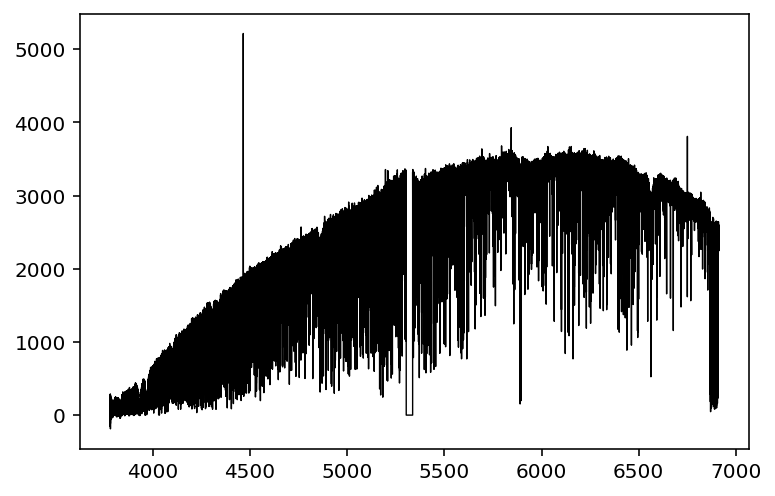

In [86]:
read_spec.plot_spec(order=66, show=True, c='k', lw=0.7)

The `plot` method accepts keywords used in `matplotlib.pylab.plot` so the plot parameters can be changed easily.

We can compare the spectrum at the star's rest frame (the one plotted above) with the unshifted spectrum in the zone of the H$\alpha$ line:

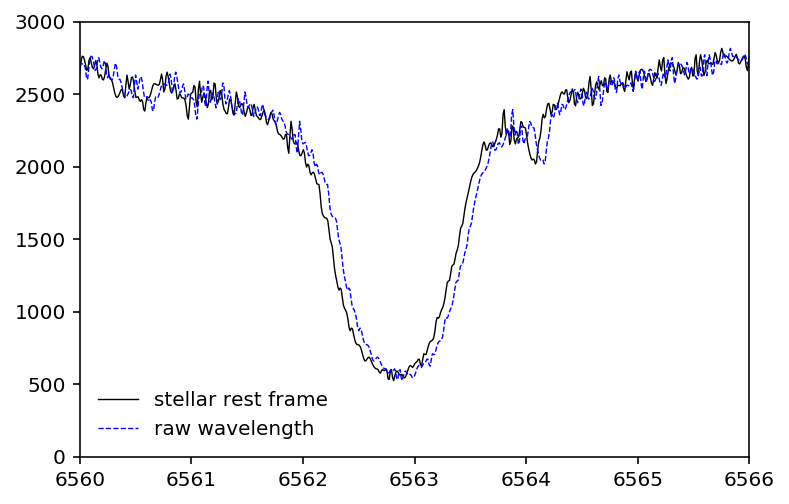

In [87]:
read_spec.plot_spec(show=False, lw=0.7, c='k', label='stellar rest frame')
read_spec.plot_spec(key_wave='wave_raw', ls='--', show=False, lw=0.7, c='b', label='raw wavelength')
plt.xlim(6560, 6566)
plt.ylim(0, 3000)
plt.legend(frameon=False, loc=3)

We can also check the cross-correlation function (CCF) profile:

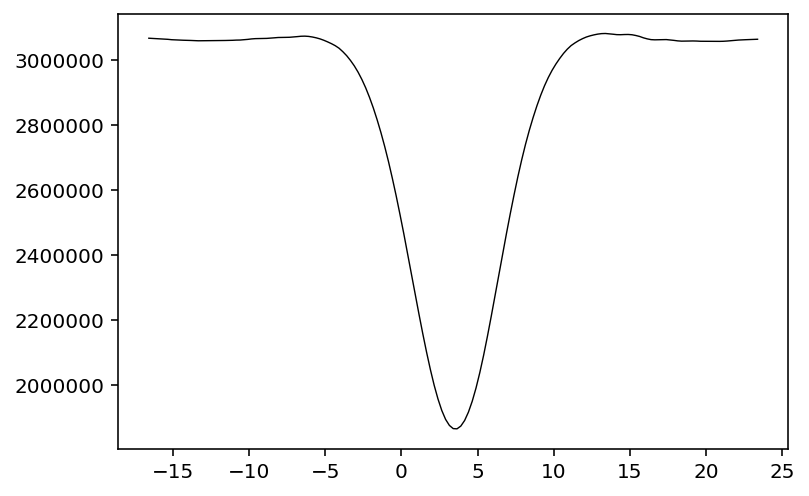

In [88]:
read_spec.plot_ccf(lw=0.7, c='k')